In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  

In [3]:
import tensorflow as tf
tf

<module 'tensorflow' from 'C:\\Users\\92316\\anaconda3\\Lib\\site-packages\\tensorflow\\__init__.py'>

In [4]:
!pip install jupyter-kite

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jupyter-kite: filename=jupyter_kite-2.0.2-py3-none-any.whl size=37346 sha256=b380014fe961852ec69be95a784e1e8f603004d503821873d59fd23d92ed0b8d
  Stored in directory: c:\users\92316\appdata\local\pip\cache\wheels\22\54\b0\5db3a6b8b5a6007b3865bb713eee32eb6c5441dd42a2a21756
Successfully built jupyter-kite


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets,losses
import matplotlib as plt
from tensorflow.keras.preprocessing import image
import numpy as np


#Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#Normalize pixel values

x_train = x_train/ 255
x_test = x_test / 255

#Build a model

model = models.Sequential([
    layers.Flatten(input_shape =(28,28)),
    layers.Dense(128, activation ='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)

])

#Compile a model

model.compile(

    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

#train a model

model.fit(x_train, y_train, epochs = 5)
model.save("Digit_classifier.keras")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy is: ", test_acc)
print("Model has been train successfully")

Epoch 1/5
1875/1875 [==============================] - 54s 27ms/step - loss: 3.5571 - accuracy: 0.2551
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 1.6307 - accuracy: 0.4353
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 1.3774 - accuracy: 0.5326
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 1.3261 - accuracy: 0.5515
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 1.2931 - accuracy: 0.5634
313/313 - 1s - loss: 1522.7759 - accuracy: 0.0972 - 1s/epoch - 4ms/step
Test Accuracy is:  0.09719999879598618
Model has been trained successfully


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
model = tf.keras.models.load_model("Digit_classifier.keras")
img_path = "digit.jpg"
img = image.load_img(img_path,target_size =(28,28), color_mode = "grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(predicted_class)

1/1 [==============================] - 0s 103ms/step
1


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Loading Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=5)

# Save the trained model
model.save("FashionMNIST_classifier.keras")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy is:", test_acc)
print("Model has been trained successfully")


4422102/4422102 [==============================] - 2s 0us/step
Epoch 1/5
1875/1875 [==============================] - 33s 4ms/step - loss: 0.5401 - accuracy: 0.8084
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4040 - accuracy: 0.8529
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3695 - accuracy: 0.8657
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3496 - accuracy: 0.8725
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3339 - accuracy: 0.8776
313/313 - 2s - loss: 0.3498 - accuracy: 0.8756 - 2s/epoch - 5ms/step
Test Accuracy is: 0.8755999803543091
Model has been trained successfully


In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np
model = tf.keras.models.load_model("FashionMNIST_classifier.keras")
img_path = "dress.jpg"
img = image.load_img(img_path,target_size =(28,28), color_mode = "grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(predictions)
print(predicted_class)

1/1 [==============================] - 0s 167ms/step
[[  3.4727325  -2.4034915  -2.0230618   4.286769   -4.49532    -8.845386
    3.5810893 -14.548022   -3.687461   -9.676384 ]]
3


In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile a model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train a model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model
model.save("CIFAR10_classifier.keras")

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy is: ", test_acc)
print("Model has been trained successfully")


Epoch 1/10
1563/1563 [==============================] - 76s 33ms/step - loss: 1.5234 - accuracy: 0.4425 - val_loss: 1.2565 - val_accuracy: 0.5445
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1726 - accuracy: 0.5827 - val_loss: 1.1577 - val_accuracy: 0.5848
Epoch 3/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0221 - accuracy: 0.6390 - val_loss: 1.0103 - val_accuracy: 0.6418
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9184 - accuracy: 0.6780 - val_loss: 0.9027 - val_accuracy: 0.6846
Epoch 5/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8428 - accuracy: 0.7050 - val_loss: 0.9153 - val_accuracy: 0.6842
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7845 - accuracy: 0.7250 - val_loss: 0.8588 - val_accuracy: 0.7031
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7350 - accuracy: 0.7416 - val_loss: 0.8929 -

1/1 [==============================] - 0s 187ms/step


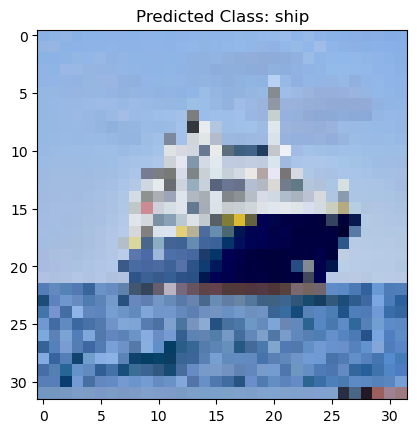

In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("CIFAR10_classifier.keras")

# Define the class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load an image for classification (change the filename accordingly)
image_path = "cifar.jpg"
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Classify the image
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

# Display the original image
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_label}")
plt.show()


In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Build a model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(x_test, y_test)
)

# Save the model
model.save("CIFAR100_classifier_augmented.keras")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy is:", test_acc)
print("Model has been trained successfully")
import 

Epoch 1/30
1563/1563 [==============================] - 88s 48ms/step - loss: 4.0724 - accuracy: 0.0725 - val_loss: 3.6865 - val_accuracy: 0.1359
Epoch 2/30
1563/1563 [==============================] - 76s 48ms/step - loss: 3.5628 - accuracy: 0.1517 - val_loss: 3.3385 - val_accuracy: 0.1974
Epoch 3/30
1563/1563 [==============================] - 73s 47ms/step - loss: 3.3137 - accuracy: 0.1975 - val_loss: 3.1172 - val_accuracy: 0.2353
Epoch 4/30
1563/1563 [==============================] - 74s 48ms/step - loss: 3.1467 - accuracy: 0.2253 - val_loss: 3.0051 - val_accuracy: 0.2598
Epoch 5/30
1563/1563 [==============================] - 76s 49ms/step - loss: 3.0362 - accuracy: 0.2466 - val_loss: 2.9484 - val_accuracy: 0.2699
Epoch 6/30
1563/1563 [==============================] - 73s 47ms/step - loss: 2.9475 - accuracy: 0.2660 - val_loss: 2.8125 - val_accuracy: 0.2903
Epoch 7/30
1563/1563 [==============================] - 73s 47ms/step - loss: 2.8848 - accuracy: 0.2780 - val_loss: 2.7180 -

In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255

model = models.Sequential( [
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile a model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train a model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model
model.save("CIFAR10_classifier.keras")

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy is: ", test_acc)
print("Model has been trained successfully")


Epoch 1/10
1563/1563 [==============================] - 96s 49ms/step - loss: 1.4931 - accuracy: 0.4600 - val_loss: 1.2467 - val_accuracy: 0.5577
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1078 - accuracy: 0.6071 - val_loss: 1.0733 - val_accuracy: 0.6201
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9497 - accuracy: 0.6678 - val_loss: 0.9581 - val_accuracy: 0.6651
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8551 - accuracy: 0.7016 - val_loss: 0.9196 - val_accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7797 - accuracy: 0.7250 - val_loss: 0.8869 - val_accuracy: 0.6952
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7224 - accuracy: 0.7479 - val_loss: 0.8824 - val_accuracy: 0.6992
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6702 - accuracy: 0.7652 - val_loss: 0.8653 -

1/1 [==============================] - 1s 698ms/step


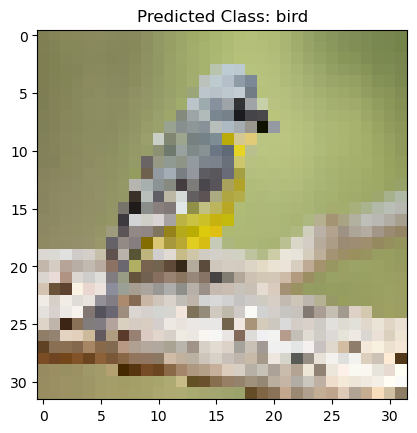

In [81]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("CIFAR10_classifier.keras")

# Define the class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load an image for classification (change the filename accordingly)
image_path = "cifar.jpg"
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Classify the image
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

# Display the original image
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_label}")
plt.show()

In [106]:
import os
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your captcha images are in a directory named 'captcha_images'
captcha_dir = 'captcha'

# Function to preprocess images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(50, 200))
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Load images and labels
images = []
labels = []

for filename in os.listdir(captcha_dir):
    if filename.endswith('.jpg'):  # Assuming images are in PNG format
        img_path = os.path.join(captcha_dir, filename)
        img_array = preprocess_image(img_path)
        images.append(img_array)
        labels.append(filename.split('.')[0])
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = to_categorical(encoded_labels)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Build a simple convolutional neural network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model
model.save('captcha_model.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy is: ", test_acc)
print("Model has been trained successfully")

KeyboardInterrupt: 

In [102]:
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop 
from keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

# Create the model with more layers and regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Added layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(100, activation='softmax')
])

# Compile the model with a different optimizer
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

# Train the model for more epochs with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=50,  # Increased epochs
          validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
1563/1563 [==============================] - 146s 87ms/step - loss: 4.1108 - accuracy: 0.0669 - val_loss: 3.7485 - val_accuracy: 0.1234
Epoch 2/50
1563/1563 [==============================] - 126s 81ms/step - loss: 3.6563 - accuracy: 0.1385 - val_loss: 3.4694 - val_accuracy: 0.1639
Epoch 3/50
1563/1563 [==============================] - 112s 72ms/step - loss: 3.4611 - accuracy: 0.1723 - val_loss: 3.3202 - val_accuracy: 0.2063
Epoch 4/50
1563/1563 [==============================] - 100s 64ms/step - loss: 3.3440 - accuracy: 0.1960 - val_loss: 3.0526 - val_accuracy: 0.2512
Epoch 5/50
1563/1563 [==============================] - 100s 64ms/step - loss: 3.2724 - accuracy: 0.2122 - val_loss: 2.9188 - val_accuracy: 0.2770
Epoch 6/50
1563/1563 [==============================] - 118s 76ms/step - loss: 3.2258 - accuracy: 0.2213 - val_loss: 2.9040 - val_accuracy: 0.2792
Epoch 7/50
1563/1563 [==============================] - 142s 91ms/step - loss: 3.1998 - accuracy: 0.2256 - val_loss: 2

In [97]:
string = "1242"
previous_digit = None
output_string = ""
for i in string:
    if i == previous_digit:
     continue
    else:
     output_string += i
     previous_digit = i

print(output_string)


1242


In [103]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


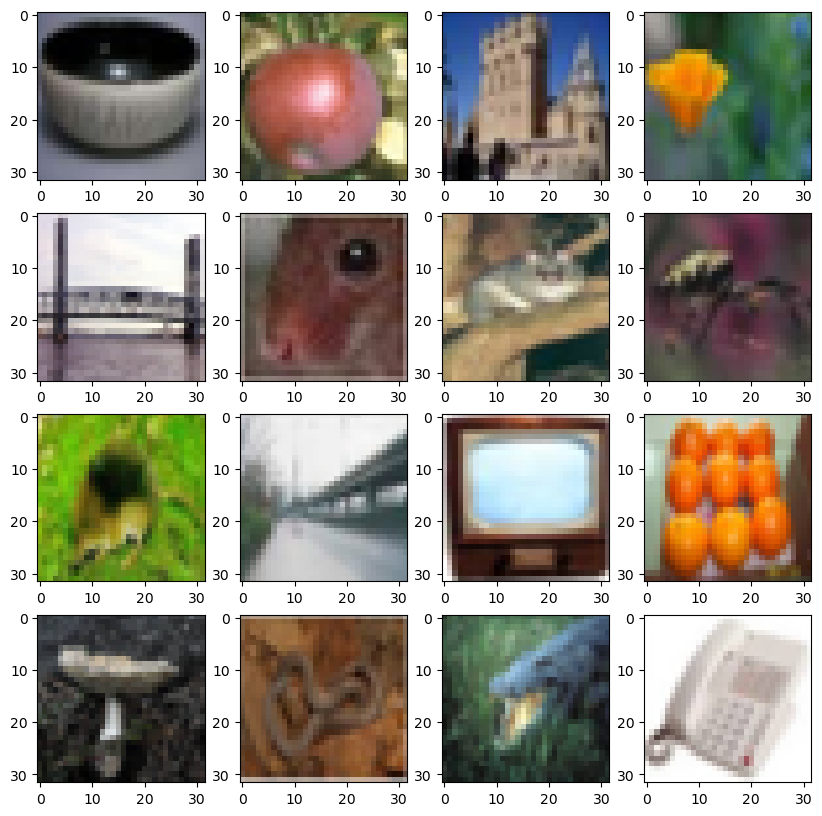

In [104]:
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])